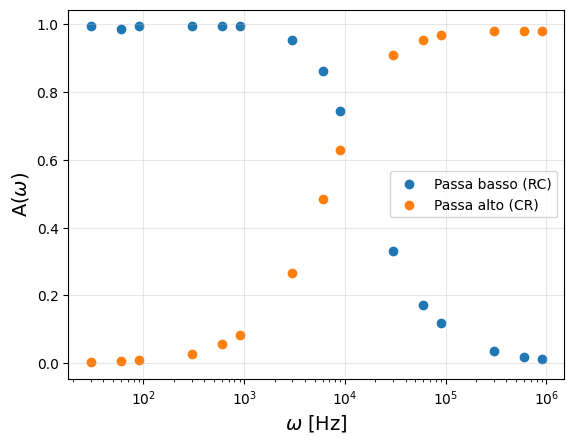

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

data1 = pd.read_csv("Passa basso.csv")
data2 = pd.read_csv("Passa alto.csv")
plt.xscale("log")
plt.grid(alpha=0.3)
plt.ylabel(r"A($\omega$)", fontsize=14)
plt.xlabel(r"$\omega$ [Hz]", fontsize=14)
plt.scatter(data1["freq"], data1["V/V0"], label="Passa basso (RC)")
plt.scatter(data2["freq"], data2["V/V0"], label="Passa alto (CR)")
plt.legend()

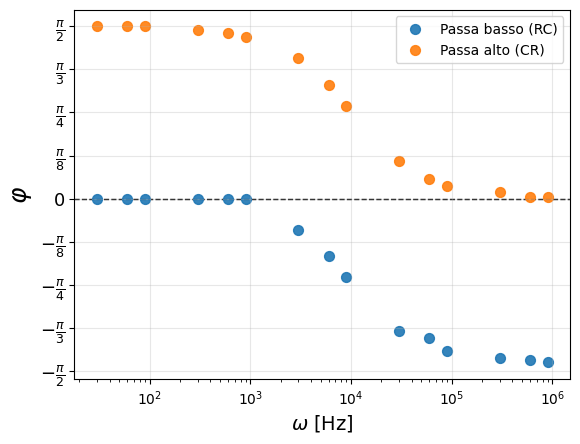

In [69]:
import numpy as np
ticks = np.linspace(-90, 90, 9)
tickss = [2, 3, 4, 8]
plt.yticks(ticks, [r"$-\frac{{\pi}}{{{}}}$".format(val) for val in tickss]+[0]+[r"$\frac{{\pi}}{{{}}}$".format(val) for val in tickss[::-1]], fontsize=13)
plt.xlabel(r"$\omega$ [Hz]", fontsize=14)
plt.ylabel(r"$\varphi$", fontsize=18)
plt.grid(alpha=0.3, zorder=0)
plt.xscale("log")
plt.scatter(data1["freq"], -data1["fase"], label="Passa basso (RC)", zorder=1, s=50, alpha=0.9)
plt.scatter(data2["freq"], data2["fase"], label="Passa alto (CR)", zorder=1, s=50, alpha=0.9)
plt.legend()
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, zorder=0)
plt.savefig("fase.png")

In [68]:
import numpy as np
primo = data1.iloc[7:12]
secondo = data2.iloc[7:12]

a1, b1 = np.polyfit(primo["freq"], primo["V/V0"], 1)
a2, b2 = np.polyfit(secondo["freq"], secondo["V/V0"], 1)

print(a1, b1)
print(a2, b2)

v = (b2-b1)/(a1-a2)
print("Frequenza di taglio: ", v)


-8.628383730046949e-06 0.7825789040718307
5.160872843309859e-06 0.5866330889109156
Frequenza di taglio:  14210.034755573104


La frequenza di taglio è: 10804.9+-31.58


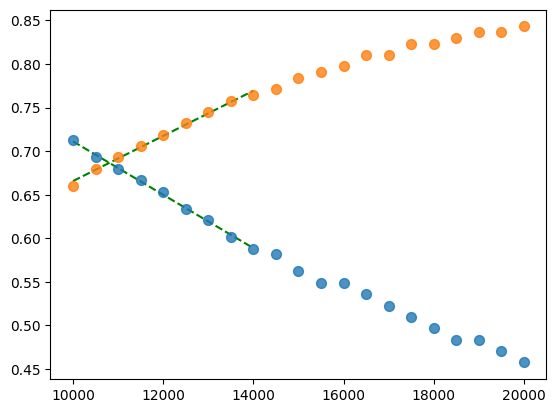

In [78]:
import pandas as pd
from math import sqrt
d1 = pd.read_csv("Passa basso fine.csv")
d2 = pd.read_csv("Passa alto fine.csv")

plt.scatter(d1["freq"], d1["V/V0"], zorder=1, s=50, alpha=0.8)
plt.scatter(d2["freq"], d2["V/V0"], zorder=1, s=50, alpha=0.8)
w1 = 1/((d1["err V"]/d1["V0"])+(d1["err V"]/d1["Vmis"]))*d1["V/V0"]
w2 = 1/((d2["err V"]/d2["V0"])+(d2["err V"]/d2["Vmis"]))*d2["V/V0"]

(a1, b1), cov1 = np.polyfit(d1.iloc[0:9]["freq"], d1.iloc[0:9]["V/V0"], 1, w=w1.iloc[0:9], cov=True)
var_b1 = cov1[1,1]
var_a1 = cov1[0,0]
cov_1 = cov1[1,0]

lin = np.linspace(d1.iloc[0:9]["freq"].min(), d1.iloc[0:9]["freq"].max())
plt.plot(lin, a1*lin+b1, c="g", linestyle="--", zorder=0)

(a2, b2), cov2 = np.polyfit(d2.iloc[0:9]["freq"], d2.iloc[0:9]["V/V0"], 1, w=w2.iloc[0:9], cov=True)
var_b2 = cov2[1,1]
var_a2 = cov2[0,0]
cov_2 = cov2[1,0]

lin = np.linspace(d2.iloc[0:9]["freq"].min(), d2.iloc[0:9]["freq"].max())
plt.plot(lin, a2*lin+b2, c="g", linestyle="--", zorder=0)
plt.savefig("freq_taglio.png")

v=(b2-b1)/(a1-a2)
sigma_v = ((b2-b1)**2/(a1-a2)**4)*(var_a1+var_a2)+(1/(a1-a2)**2)*(var_b1+var_b2)+2*((b2-b1)/(a1-a2)**3)*(cov_1+cov_2)
print("La frequenza di taglio è: " + str(round(v, 2)) + "+-" + str(round(sqrt(sigma_v), 2)))

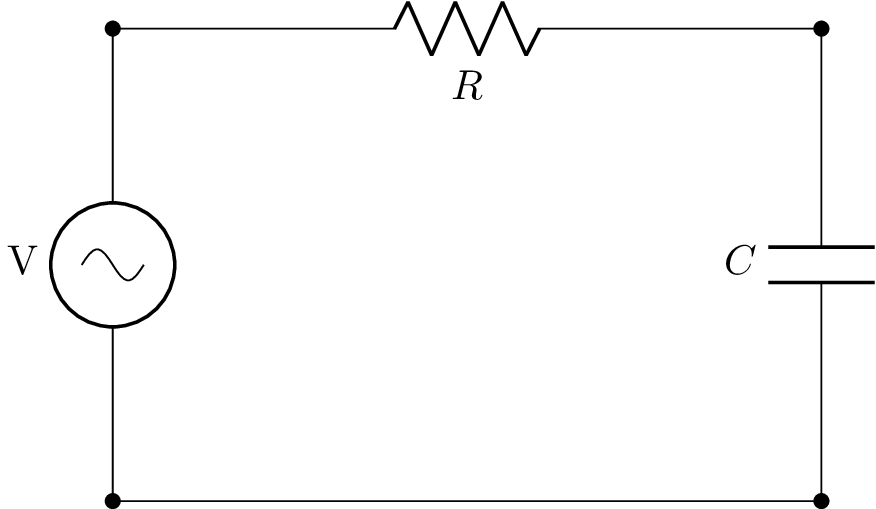

In [80]:
from lcapy import Circuit
rc = Circuit("""
BL1 1 0; down=2, kind=vco, l=V
R 1 2; right=3
C 2 3; down=2
W 3 0; left=3
"""
)
rc.draw(scale=1, label_nodes=False)
rc.draw("passa_basso.pgf", scale=1, label_nodes=False)

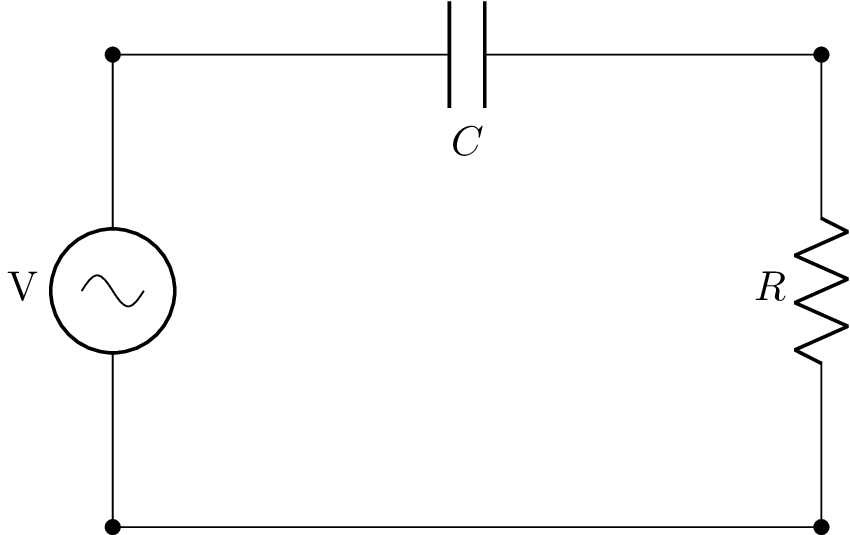

In [81]:
cr = Circuit("""
BL1 1 0; down=2, kind=vco, l=V
C 1 2; right=3
R 2 3; down=2
W 3 0; left=3
"""
)
cr.draw(scale=1, label_nodes=False)
rc.draw("passa_alto.pgf", scale=1, label_nodes=False)